In [1]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string  
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle
import streamlit

In [3]:
print("Pandas: ",pd.__version__)
print("Numpy: ",np.__version__)
print("Matplotlib: ",matplotlib.__version__)
print("Seaborn: ",sns.__version__)
print("NLTK: ",nltk.__version__)
print("RegEx: ",re.__version__)
print("Sklearn: ",sklearn.__version__)
print("Streamlit", streamlit.__version__)

Pandas:  2.2.2
Numpy:  2.0.1
Matplotlib:  3.9.0
Seaborn:  0.13.2
NLTK:  3.8.1
RegEx:  2.2.1
Sklearn:  1.5.1
Streamlit 1.37.0


In [ ]:
dataset = pd.read_csv("Datasets//labeled_data.csv")
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [5]:
dataset.isnull()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
24778,False,False,False,False,False,False,False
24779,False,False,False,False,False,False,False
24780,False,False,False,False,False,False,False
24781,False,False,False,False,False,False,False


In [6]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [ ]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:

dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [9]:
dataset.shape

(24783, 7)

In [10]:
dataset.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [ ]:

dataset["labels"] = dataset["class"].map({0:"Hate Speech", 1:"Offensive Language", 2:"Neither"})
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,Neither
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",Neither
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


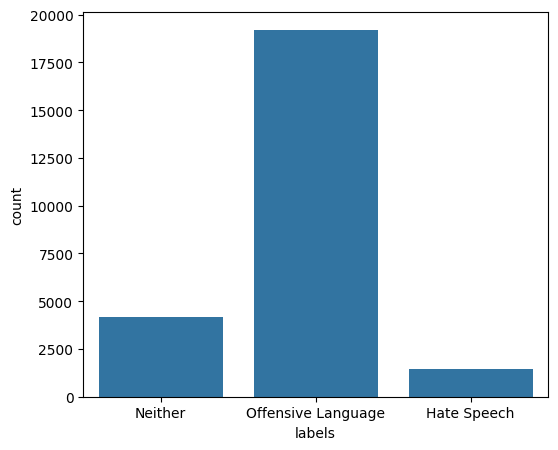

In [ ]:

plt.subplots(figsize=(6,5)) 
sns.countplot(x='labels',data=dataset)
plt.show()

In [13]:
data = dataset[["tweet","labels"]]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,Neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",Neither
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [ ]:

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vprad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
 
stopwords = set(stopwords.words("english"))

In [ ]:
 
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:

stemming = nltk.SnowballStemmer("english") 

In [ ]:

def cleaning(text):
    text = str(text).lower()
    text = re.sub("https?://\S+|www\.\S+", "", text)
    text = re.sub("\[.*?\]", "", text)
    text = re.sub("<.*?>", "", text)
    text = re.sub("[%s]" %re.escape(string.punctuation), "", text)
    text = re.sub("\n", "", text)
    text = re.sub("\w*\d\w*", "", text)
    text = re.sub("rt", "", text)

    text = [word for word in text.split(" ") if word not in stopwords]
    text = " ".join(text)

    text = [stemming.stem(word) for word in text.split(" ")]
    text = " ".join(text)
    return text

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\vprad\AppData\Local\Temp\ipykernel_10608\24833334.py:4: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub("https?://\S+|www\.\S+", "", text)
C:\Users\vprad\AppData\Local\Temp\ipykernel_10608\24833334.py:5: SyntaxWarning: invalid escape sequence '\['
  text = re.sub("\[.*?\]", "", text)
C:\Users\vprad\AppData\Local\Temp\ipykernel_10608\24833334.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub("\w*\d\w*", "", text)


In [ ]:

data["tweet"] = data["tweet"].apply(cleaning)

C:\Users\vprad\AppData\Local\Temp\ipykernel_10608\3935410062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(cleaning)


In [20]:
data

,tweet,labels
0,mayasolov woman shouldnt complain clean hous...,Neither
1,boy dat coldtyga dwn bad cuffin dat hoe place,Offensive Language
2,urkindofbrand dawg ever fuck bitch sta cri...,Offensive Language
3,cganderson vivabas look like tranni,Offensive Language
4,shenikarob shit hear might true might faker ...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong hea babi drove redneck c...,Neither
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [ ]:

X = np.array(data["tweet"])
y = np.array(data["labels"])

In [22]:
X

array(['  mayasolov woman shouldnt complain clean hous amp man alway take trash',
       '   boy dat coldtyga dwn bad cuffin dat hoe  place',
       '  urkindofbrand dawg   ever fuck bitch sta cri confus shit', ...,
       'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [23]:
y

array(['Neither', 'Offensive Language', 'Offensive Language', ...,
       'Offensive Language', 'Offensive Language', 'Neither'],
      dtype=object)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:

cv = CountVectorizer()
X = cv.fit_transform(X)

In [26]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 190718 stored elements and shape (24783, 25654)>

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [28]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (16604, 25654)
X_test: (8179, 25654)
y_train: (16604,)
y_test: (8179,)


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:

y_pred = dt.predict(X_test)
y_pred

array(['Offensive Language', 'Offensive Language', 'Offensive Language',
       ..., 'Offensive Language', 'Offensive Language',
       'Offensive Language'], dtype=object)

In [ ]:

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 178,   35,  252],
       [  33, 1165,  181],
       [ 253,  239, 5843]])

<Axes: >

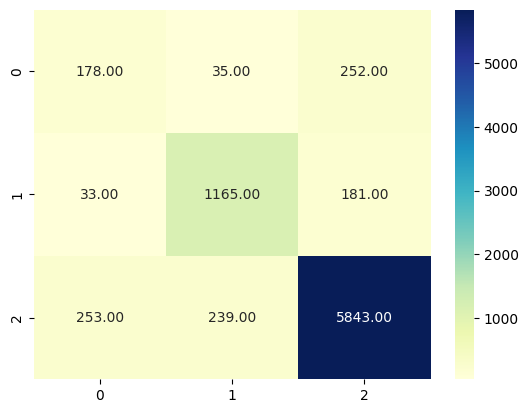

In [ ]:

sns.heatmap(cm, annot = True, fmt = ".2f", cmap = "YlGnBu")

In [ ]:

score = accuracy_score(y_test,y_pred)
score

0.8785915148551168

In [ ]:

print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

       Hate Speech       0.38      0.38      0.38       465
           Neither       0.81      0.84      0.83      1379
Offensive Language       0.93      0.92      0.93      6335

          accuracy                           0.88      8179
         macro avg       0.71      0.72      0.71      8179
      weighted avg       0.88      0.88      0.88      8179



In [ ]:

sample = input("Enter any sentence: ")
data2 = cleaning(sample)  
print("Cleaning the sentence: ", data2)

data2 = cv.transform([data2]).toarray()    
result = dt.predict(data2)
print(result)

Cleaning the sentence:  kill
['Hate Speech']


In [40]:
data["labels"]

0                   Neither
1        Offensive Language
2        Offensive Language
3        Offensive Language
4        Offensive Language
                ...        
24778    Offensive Language
24779               Neither
24780    Offensive Language
24781    Offensive Language
24782               Neither
Name: labels, Length: 24783, dtype: object

In [43]:
data["tweet"]

0          mayasolov woman shouldnt complain clean hous...
1           boy dat coldtyga dwn bad cuffin dat hoe  place
2          urkindofbrand dawg   ever fuck bitch sta cri...
3                      cganderson vivabas look like tranni
4          shenikarob shit hear might true might faker ...
                               ...                        
24778    yous muthafin lie   coreyemanuel right tl tras...
24779    youv gone broke wrong hea babi drove redneck c...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl  ntac eileen dahlia  beauti color combin...
Name: tweet, Length: 24783, dtype: object

In [37]:
pickle.dump(np.array(data["labels"]), open("dataset.pkl", "wb"))

In [38]:
pickle.dump(np.array(data["tweet"]), open("clean_data.pkl", "wb"))

In [39]:
pickle.load(open("dataset.pkl", "rb"))

array(['Neither', 'Offensive Language', 'Offensive Language', ...,
       'Offensive Language', 'Offensive Language', 'Neither'],
      dtype=object)